In [58]:
import numpy as np
import matplotlib.pyplot as plt

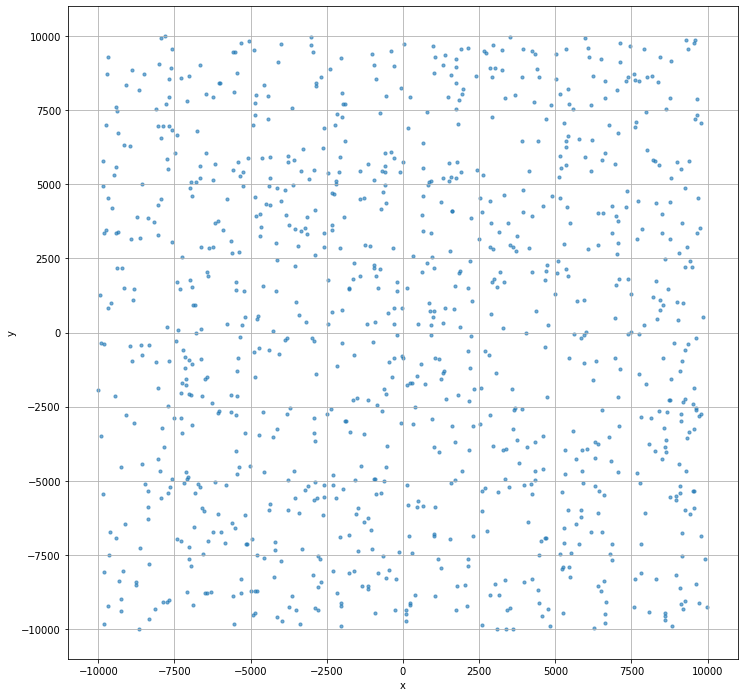

In [59]:
lim, n = 10_000, 1000
y = np.random.uniform(-lim, lim, 1000)
x = np.random.uniform(-lim, lim, 1000)

data = [(x[i], y[i]) for i in range(n)]

plt.figure(figsize=(12,12))
plt.scatter(x, y, s=10, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [60]:
k = 6
np.random.seed(0)

In [61]:
def upd(data, k, eps = 1e-12):
    data_arr = np.array(data)
    muo_k = np.array([data[i] for i in np.random.choice(len(data), size=k, replace=False)])

    distortions = []
    colors = np.zeros(len(data), dtype=int)
    
    while len(distortions) < 2 or np.abs(distortions[-1]-distortions[-2])>eps:
        j = 0.0
        for i in range(len(data)):
            dists = np.linalg.norm(data_arr[i] - muo_k, axis=1)
            x = np.argmin(dists)
            colors[i] = x
            j+= dists[x]

        distortions.append(j)
        new_muo = []
        for x in range(len(muo_k)):
            pts = data_arr[colors==x]
            if len(pts) > 0:
                new_muo.append(pts.mean(axis=0))
            else:
                new_muo.append(muo_k[x])
        muo_k = np.array(new_muo)

    return colors, muo_k, distortions



In [62]:
colors, muo_k, distortions = upd(data, 6)
print(distortions)

[np.float64(4184650.498768079), np.float64(3565090.638502907), np.float64(3366684.954447233), np.float64(3286172.2534968723), np.float64(3240195.2261601416), np.float64(3214360.0143937557), np.float64(3209693.1089044823), np.float64(3206194.4722381476), np.float64(3201628.5298436335), np.float64(3197152.122248238), np.float64(3194962.307402539), np.float64(3193059.817224127), np.float64(3189431.5721710734), np.float64(3186723.628710786), np.float64(3183043.665670546), np.float64(3179252.7475521946), np.float64(3175692.790918573), np.float64(3170866.306637518), np.float64(3167868.8323628767), np.float64(3164180.236315183), np.float64(3162504.2545881635), np.float64(3161957.423213212), np.float64(3161604.258778923), np.float64(3161531.350445242), np.float64(3161531.350445242)]


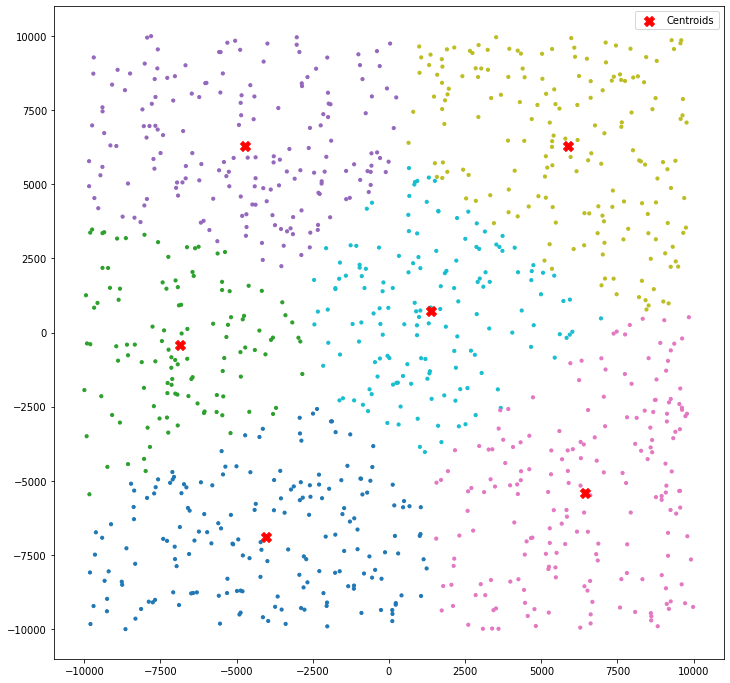

In [63]:
plt.figure(figsize=(12,12))
plt.scatter(x, y, c=colors, cmap="tab10", s=10)
plt.scatter(*zip(*muo_k), c="red", marker="X", s=100, label="Centroids")
plt.legend()
plt.show()